In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 线性拟合（正规方程法）
$Y=aH+W$

a为参数矢量，H为线性矩阵，W为高斯白噪声

$A=(HH^T)^{-1}HY^T$

A为a的估计量

估计参数值： [2.14952894 0.03061226 1.00469609]


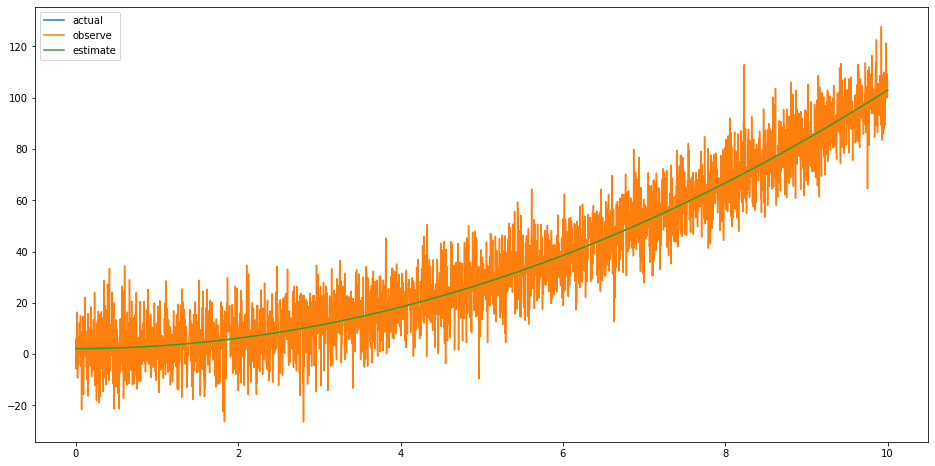

CPU times: user 1.42 s, sys: 232 ms, total: 1.66 s
Wall time: 1.42 s


In [78]:
%%time
N = 3000
t = np.linspace(0,10,N)
H = np.zeros((3,N))
H[0] = np.ones(N)
H[1] = t
H[2] = t**2
a = np.array([2,0.1,1]) # 待测参数

G_noise = stats.norm.rvs(loc=0, scale=10, size=N) # 高斯白噪声

y1 = np.dot(a,H)
y2 = y1+G_noise
A = np.linalg.inv(H.dot(H.T)).dot(H).dot(y2.T)
y3 = np.dot(A,H)

print('估计参数值：',A)

plt.figure(figsize=(16,8))
plt.plot(t,y1,label='actual')
plt.plot(t,y2,label='observe')
plt.plot(t,y3,label='estimate')
plt.legend(loc='best')
plt.show()

### 线性拟合（梯度下降法）
代价函数：$J(\theta_0,\theta_1...\theta_n)=\frac{1}{m}\sum{m}^{i=1}(h_\theta(x^{(i)})-y^{i})^2$

$\theta_j=\theta_j-\alpha\frac{{\partial}J(\theta_0,\theta_1...\theta_n)}{{\partial}\theta_j}$

估计参数值： [1.99860873 0.36822686 0.96497848]


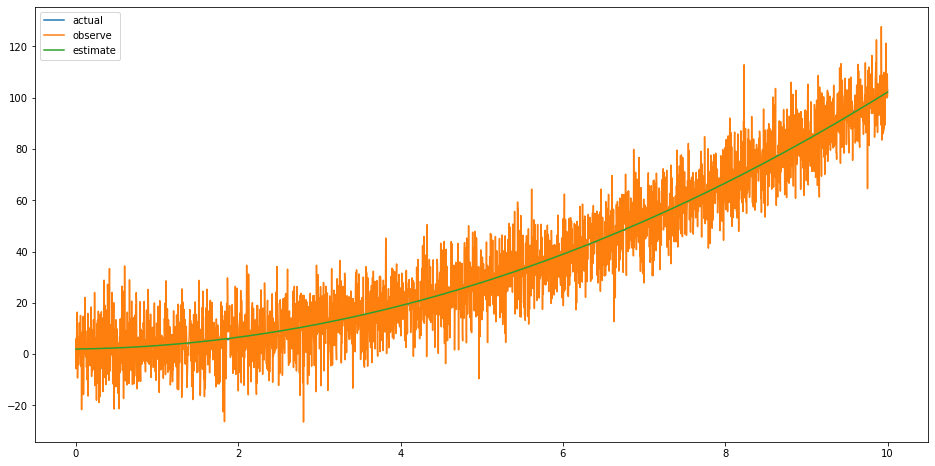

CPU times: user 16.7 s, sys: 5.31 s, total: 22 s
Wall time: 22 s


In [80]:
%%time
def costFuction(A,H,y2):
    return (A.dot(H)-y2).dot((A.dot(H)-y2).T)/2/y2.shape[0]

A = np.array([3,3,3])

for i in range(100000):
    A = A-0.00001*(A.dot(H)-y2).dot(H.T)/y2.shape[0]
    
y3 = np.dot(A,H)
print('估计参数值：',A)

plt.figure(figsize=(16,8))
plt.plot(t,y1,label='actual')
plt.plot(t,y2,label='observe')
plt.plot(t,y3,label='estimate')
plt.legend()
plt.show()

估计参数值： [1.98110416 1.0255669 ]


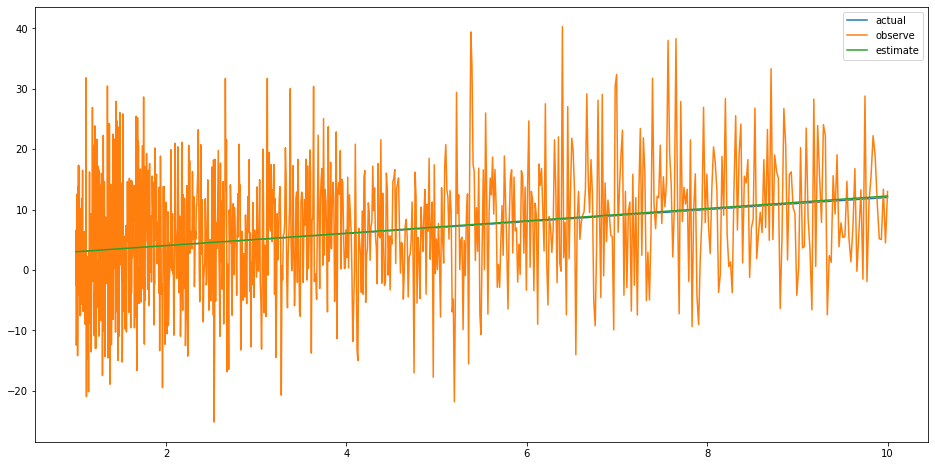

CPU times: user 1.28 s, sys: 144 ms, total: 1.42 s
Wall time: 1.2 s


In [4]:
%%time
N = 1000
t = np.logspace(0,1,N)
H = np.zeros((2,N))
H[0] = np.ones(N)
H[1] = t
a = np.array([2,1]) # 待测参数

G_noise = stats.norm.rvs(loc=0, scale=10, size=N) # 高斯白噪声

y1 = np.dot(a,H)
y2 = y1+G_noise
A = np.linalg.inv(H.dot(H.T)).dot(H).dot(y2.T)
y3 = np.dot(A,H)

print('估计参数值：',A)

plt.figure(figsize=(16,8))
plt.plot(t,y1,label='actual')
plt.plot(t,y2,label='observe')
plt.plot(t,y3,label='estimate')
plt.legend(loc='best')
plt.show()